In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
from random import sample #Used for random initialization
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
from scipy import linalg #Used for the "SVD" function
from mpl_toolkits.mplot3d import Axes3D

In [2]:
cd C:\Users\诚明\Desktop\MachineLearning\machine-learning-ex7\ex7

C:\Users\诚明\Desktop\MachineLearning\machine-learning-ex7\ex7


In [72]:
mat = scipy.io.loadmat('ex7data2.mat')
X = mat['X']

In [4]:
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# 1. K-means Clustering

## 1.1. Data Visualization

In [33]:
def plotData(x, centroids_arr, idx = None):      # centroids_arr should be an array of centroids in order to draw the movements of centroids
    plt.figure(figsize = (15,10))
    colors = ['b', 'g', 'gold', 'darkorange', 'salmon', 'oliverdrab']
    m = x.shape[0]
    
    if idx is None:
        idx = np.ones((m, 1))
    
    for i in np.unique(idx):   
        i = int(i)
        plt.plot(x[np.where(idx == i)[0],0], x[np.where(idx == i)[0],1], 'o', color = colors[i-1], label = 'Group: %s' % i, alpha = 0.5)
        plt.grid(linestyle = '-.', alpha = 0.5)
        plt.xlabel('X1', fontsize = 14)
        plt.ylabel('X2', fontsize = 14)
        plt.legend(framealpha = 0.5, loc = 4, fontsize = 'x-large')
    
    tempx, tempy = [], []
    for cen in centroids_arr:
        tempx.append(cen[:,0])
        tempy.append(cen[:,1])
    for i in range(len(tempx[0])):
        plt.plot(tempx, tempy, color = 'black', linestyle = '--', linewidth = 2, \
                     marker = 'x', markeredgecolor = 'red', markeredgewidth = 3, markersize = 8)

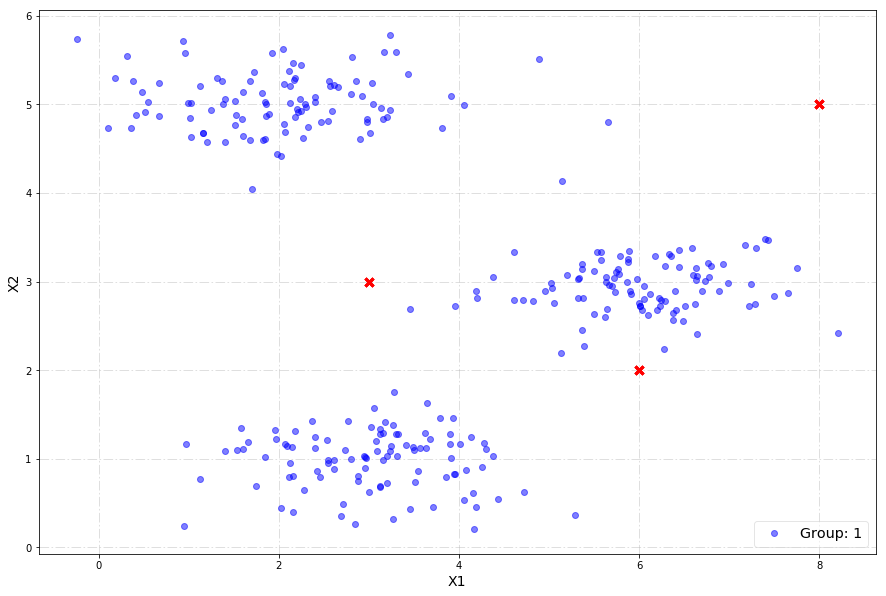

In [34]:
plotData(X, [initial_centroids])

## 1.2. Find Closest Centroids

In [78]:
def findClosestCentroid(x, centroids):
    idx = []
    m = x.shape[0]
    for i in range(m):
        xi = x[i]
        idx.append(np.argmin([np.linalg.norm(xi - cen, 2) for cen in centroids])+1)
    return np.array(idx)

In [8]:
idx = findClosestCentroid(X, initial_centroids)
idx[:3]

array([1, 3, 2], dtype=int64)

## 1.3 Compute Centroids

In [9]:
def computeCentroids(x, centroids):
    idx = findClosestCentroid(x, centroids)
    cen = []
    for i in np.unique(idx):
        cen.append(np.mean(x[np.where(idx == i)], axis = 0))
    return np.array(cen)

In [10]:
centroids = computeCentroids(X,initial_centroids)
centroids

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

## 1.4. K-means with fixed initial centroids

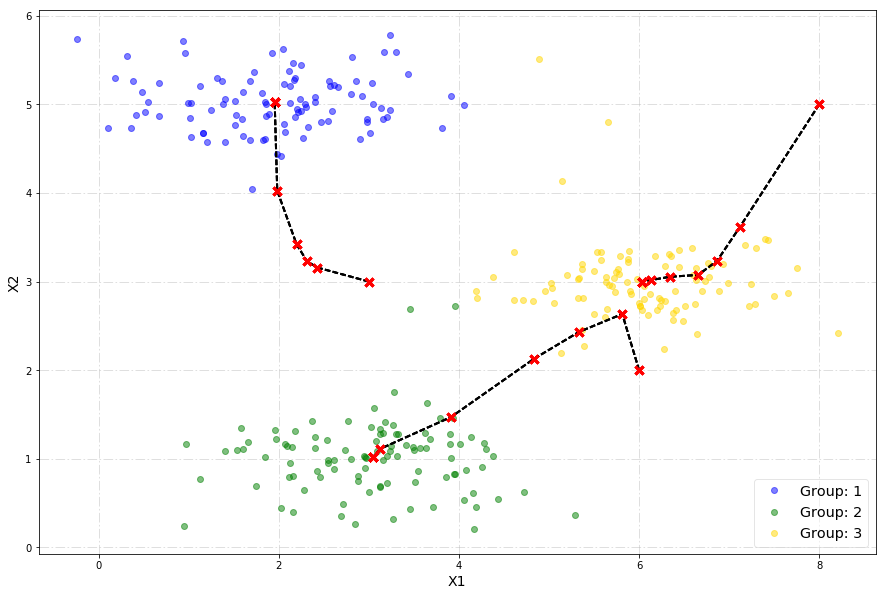

In [157]:
def runKmeans(x, initial_centroids, iterations = 10):
    centroids = []
    centroids.append(initial_centroids)
    for _ in range(iterations):
        idx = findClosestCentroid(x, centroids[-1])
        centroids.append(computeCentroids(x, centroids[-1]))
    centroids_arr = centroids
    return centroids_arr, idx
centroids_arr, idx = runKmeans(X, initial_centroids)
plotData(X, centroids_arr, idx = idx)

## 1.5. Random Initialization

In [74]:
def KmeansInitCentroids(x, K):
    m = x.shape[0]
    perm = np.random.permutation(m)[:K]
    centroids = x[perm]
    return centroids

## 1.6. K-means on example data

In [13]:
def costfunc(x, centroids):
    idx = findClosestCentroid(x, centroids)
    J = 0
    for i in np.unique(idx):
        i = int(i)
        n = len(idx[idx == i])
        cen = centroids[i - 1]
        for j in range(n):
            J += np.linalg.norm(x[np.where(idx == i)][j] - cen, 2)**2
    return float(J)

In [135]:
def Kmeans(x, K, iterations1 = 10, iterations2 = 10, plot = True):
    cost = [1e10]
    for i in range(iterations1):
        init_centroids = KmeansInitCentroids(x, K)
        centroids_arr, idx = runKmeans(x, init_centroids, iterations2)
        centroids = centroids_arr[-1]
        cost.append(costfunc(x, centroids))
        if cost[i+1] < min(cost[:-1]):
            centroids_arr_final = centroids_arr
            idx_final = idx
            if plot:
                print('mini_cost = %.5f' % cost[i+1])
                plt.close()
                plotData(x, centroids_arr, idx)
        else:
            continue
    return centroids_arr, idx

mini_cost = 860.05495
mini_cost = 266.65852


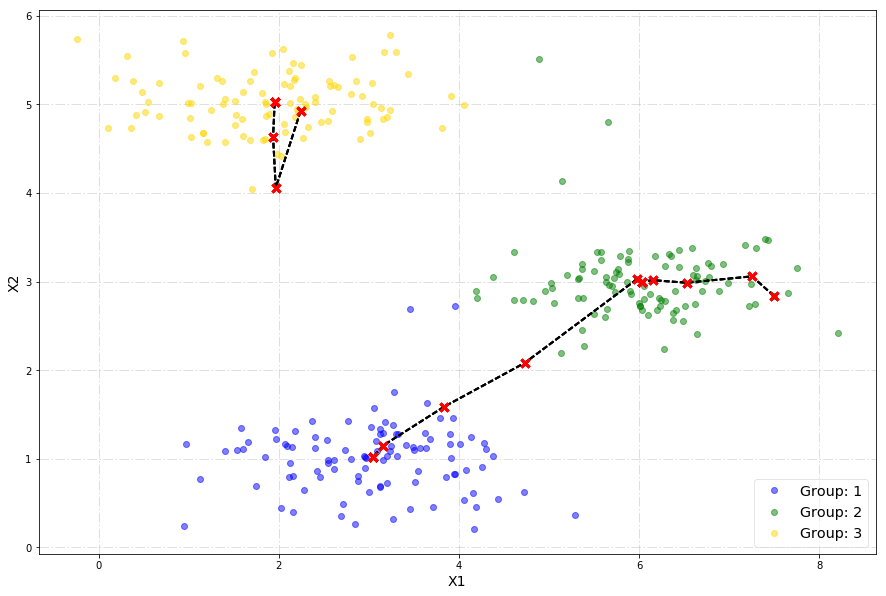

In [136]:
centroids_arr, idx = Kmeans(X, 3, iterations1 = 10, iterations2 = 10)

# 2. Image Compression with K-means

A shape is  (128, 128, 3)


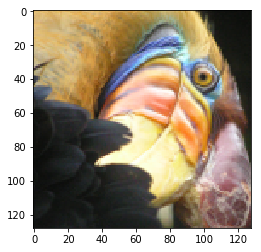

In [178]:
# This creates a three-dimensional matrix A whose first two indices 
# identify a pixel position and whose last index represents red, green, or blue.
A = scipy.misc.imread('bird_small.png')

print ("A shape is ",A.shape)
dummy = plt.imshow(A)

In [179]:
A = A/255
A = A.reshape((A.shape[0] * A.shape[1], A.shape[2]))
K = 16
centroids_arr, idx = Kmeans(A, K, iterations1 = 5, iterations2 = 10, plot = False)
centroids = centroids_arr[-1]

In [180]:
final_pic = np.zeros((idx.shape[0], 3))

In [181]:
for i in range(idx.shape[0]):
    final_pic[i] = centroids[idx[i]-1]

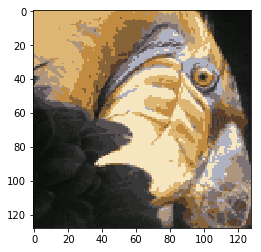

In [182]:
plt.imshow(final_pic.reshape(128,128,3))

# 3. Principal Component Analysis

In [3]:
data = scipy.io.loadmat('ex7data1.mat')
X = data['X']
print('Shape of X:', X.shape)

Shape of X: (50, 2)


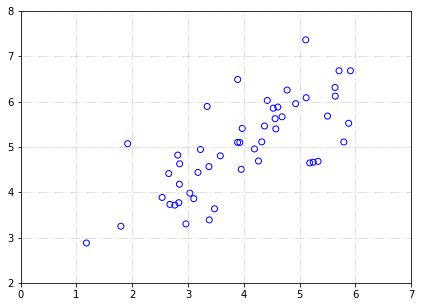

In [4]:
def plotData():
    plt.figure(figsize = (7,5))
    plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors='b')
    plt.xlim(0,7)
    plt.ylim(2,8)
    plt.grid(linestyle = '-.', alpha = 0.5)
plotData()

## 3.1. Normalization

In [5]:
def normalization(x):
    x_mean = np.mean(x, axis = 0)
    x_std = np.std(x, axis = 0)
    return (x - x_mean) / x_std, x_mean, x_std

## 3.2. Perform SVD on Covariance Matrix

In [6]:
def covariance(x):
    x_norm, x_mean, x_std = normalization(x)
    m = x_norm.shape[0]
    return x_norm.T.dot(x_norm)/m

In [7]:
def principleComponents(x):
    cov = covariance(x)
    u, s, v = scipy.linalg.svd(cov)
    return u, s, v

In [82]:
# Actually there is no need to calculate the covariance matrix
# Since only doing svd on x_norm is fine.
Ux, Sx, Vx = scipy.linalg.svd(x_norm)
print('Vx is \n%s \nv is \n%s \nThey are the same matrix. They are both eigenvectors of covariance matrix of X' % (Vx, v))
print('\n\nSx**2/m is \n%s \ns is \n%s \nThey are both eigenvalues of covariance matrix of X' % (Sx**2/50, s))

Vx is 
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]] 
v is 
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] 
They are the same matrix. They are both eigenvectors of covariance matrix of X


Sx**2/m is 
[ 1.73553038  0.26446962] 
s is 
[ 1.73553038  0.26446962] 
They are both eigenvalues of covariance matrix of X


In [34]:
x_norm, x_mean, x_std = normalization(X)

In [9]:
u, s, v = principleComponents(X)
u_xy = u * x_std + x_mean

## 3.3. Principal Components Visualization

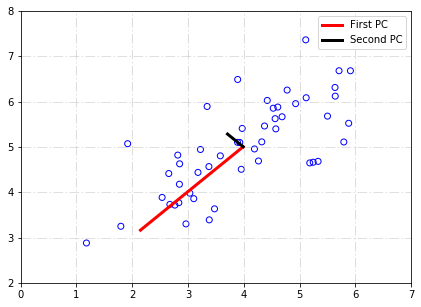

In [283]:
plotData()
plt.plot([x_mean[0], x_mean[0] + 1.5 * s[0] * u[0,0]], [x_mean[1], x_mean[1] + 1.5 * s[0] * u[0,1]], 'r-', linewidth = 3, label = 'First PC')
plt.plot([x_mean[0], x_mean[0] + 1.5 * s[1] * u[1,0]], [x_mean[1], x_mean[1] + 1.5 * s[1] * u[1,1]], 'k-', linewidth = 3, label = 'Second PC')
plt.legend()

## 3.4. Recover Data

In [289]:
def projectData(x, u, k):
    u_reduced = u[:,:k]
    x_reduced = x.dot(u_reduced)
    return x_reduced

In [292]:
X_proj = projectData(X_norm, u, 1)

In [384]:
def recoverData(z, u, k):
    u_reduced = u[:, :k]
    return z.dot(u_reduced.T)

In [322]:
X_rec = recoverData(X_proj, u, 1)

## 3.5. Visualizing the Projections

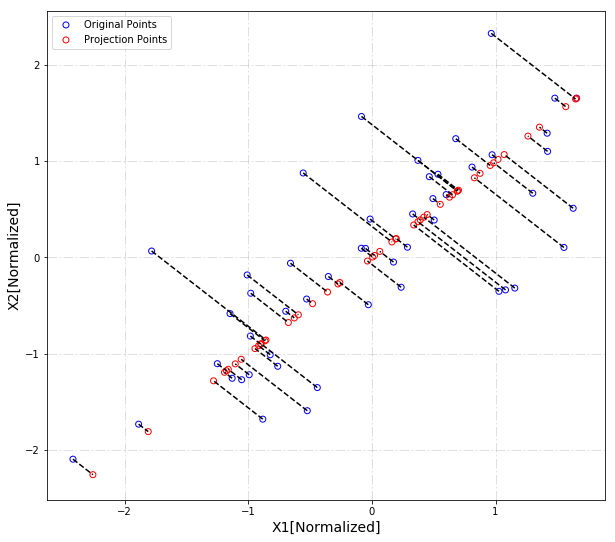

In [342]:
plt.figure(figsize = (10,9))
plt.scatter(X_norm[:,0], X_norm[:,1], facecolors='none', edgecolors='b', label = 'Original Points')
plt.scatter(X_rec[:,0], X_rec[:,1], facecolors='none', edgecolors='r', label = 'Projection Points')
for i in range(X_norm.shape[0]):
    plt.plot([X_norm[i,0], X_rec[i,0]], [X_norm[i,1], X_rec[i,1]], 'k--')
plt.legend()
plt.grid(linestyle = '-.', alpha = 0.5)
plt.xlabel('X1[Normalized]', fontsize = 14)
plt.ylabel('X2[Normalized]', fontsize = 14)

# 4. Face Image

In [343]:
face = scipy.io.loadmat('ex7faces.mat')

In [360]:
X = face['X']
print('Shape of X:', X.shape)

Shape of X: (5000, 1024)


In [372]:
def getpixels(row):
    temp = row.reshape(32, 32)
    return temp.T

def displayData(x, nrow = 10, ncol = 10):
    big_pic = np.zeros((nrow * 32, ncol * 32))
    irow, icol = 0, 0
    for i in range(nrow * ncol):
        if icol == ncol:
            icol = 0
            irow += 1
        pixels = getpixels(x[i])
        big_pic[irow * 32:irow * 32 + 32, icol * 32:icol * 32 + 32] = pixels
        icol += 1
    plt.figure(figsize = (10,8))
    plt.imshow(big_pic, cmap = cm.Greys_r)

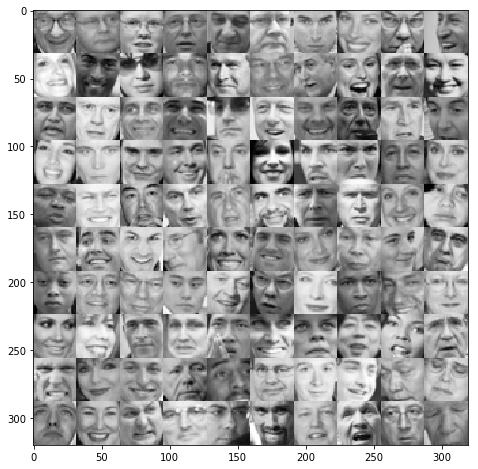

In [373]:
displayData(X)

## 4.1. Principal Components on Faces

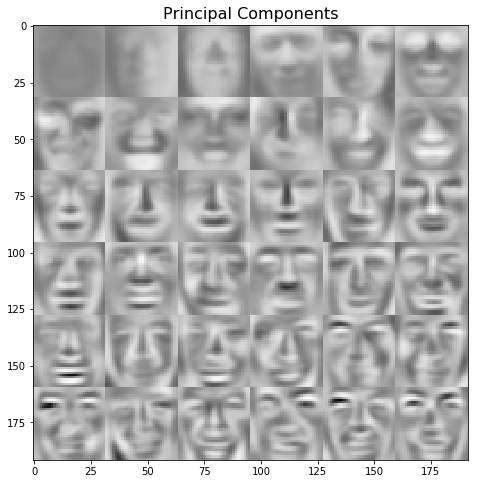

In [391]:
u, s, v = principleComponents(X)
displayData(u[:,:36].T, 6, 6)
plt.title('Principal Components', fontsize = 16)

## 4.2. Images Reconstructed from the Principal Components

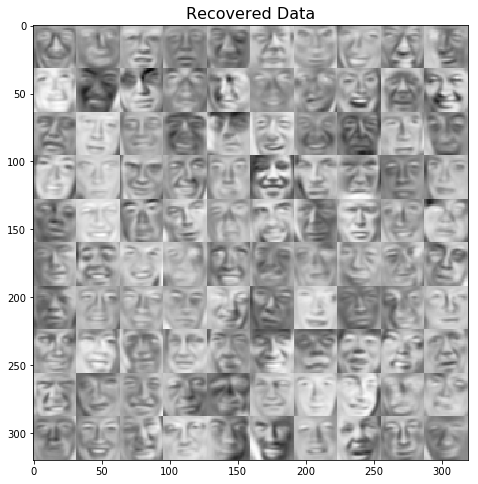

In [389]:
X_norm, X_mean, X_std = normalization(X)
X_proj = projectData(X_norm, u, 100)
X_rec = recoverData(X_proj, u, 100)
displayData(X_rec)
plt.title('Recovered Data', fontsize = 16)

# 5. PCA for Better Visualization

In [413]:
A_norm, A_mean, A_std = normalization(A)
U, S, V = principleComponents(A)
A_proj = projectData(A_norm, U, 2)

In [415]:
A_proj.shape

(16384, 2)

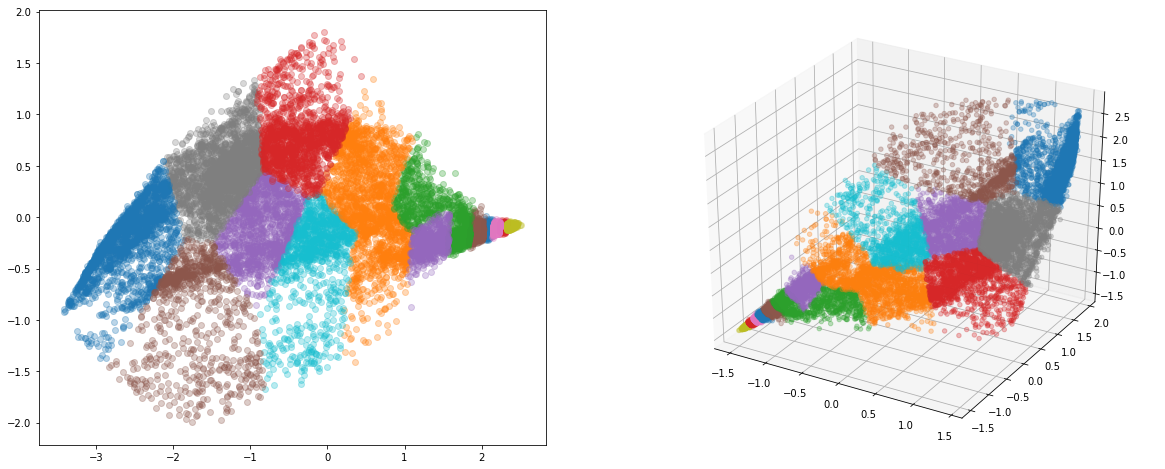

In [416]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(122, projection='3d')
for i in range(idx.shape[0]):
    ax.scatter(A_norm[np.where(idx == i+1)][:,0], A_norm[np.where(idx == i+1)][:,1], A_norm[np.where(idx == i+1)][:,2], alpha = 0.3)

ax2d = fig.add_subplot(121)
for i in range(idx.shape[0]):
    ax2d.scatter(A_proj[np.where(idx == i+1)][:,0], A_proj[np.where(idx == i+1)][:,1], alpha = 0.3)